#### 필요한 module들 import하기

In [1]:
import torch
import torch._utils_internal
import os
import cv2
from ultralytics import YOLO
from PIL import Image
from torchvision import transforms
import torch
from glob import glob
import matplotlib.pyplot as plt
import torch
from pathlib import Path
from torchvision.models import detection

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!pip freeze

In [4]:
%pwd

'/home/psw1022s'

### KREAM 웹 사이트에서 수집한 리뷰 사진 데이터 불러오기

In [2]:
img_list = glob("./data/imgs/*/*")
len(img_list)

183721

##### 영상 촬영 전 잘라놓은 객체 인식 사진들 제외하기

In [3]:
uncropped_img_list = []

for img in img_list:
  if "cropped" not in img:
   uncropped_img_list.append(img)   

In [4]:
len(uncropped_img_list)

87535

### Train한 model을 load하기

In [5]:
model = YOLO("/home/psw1022s/dataset/runs/detect/train4/weights/best.pt")

#### 잘라낸 사진들을 저장할 경로 설정하기

In [6]:
import json
filename = './data/shoe_list.json'

with open(filename, 'r')  as f:
    content = f.read()
data = json.loads(content)

In [7]:
for ids, prod_obj in enumerate(data):
  prod_id = prod_obj['product']['release']['id']
  SHOE_JSON_DIR = f"./data/imgs"
  img_filename = f"{SHOE_JSON_DIR}/{prod_id}/"

In [8]:
img_filename

'./data/imgs/99597/'

#### model을 사용하여 사진 속 객체(신발)을 검출하는 함수 정의

In [9]:
def save_cropped_region(image, box, output_path):
    x1, y1, x2, y2 = box['x'], box['y'], box['x'] + box['width'], box['y'] + box['height']
    cropped_image = image[y1:y2, x1:x2]
    cv2.imwrite(output_path, cropped_image)

#### 수집한 사진들 속에 신발을 찾아서 그 영역만 잘라내는 함수 실행하기 

In [10]:
from tqdm import tqdm

for img_file in tqdm(uncropped_img_list[17:26]):
  image = cv2.imread(img_file)
  results = model.predict(source=img_file)
  confidence_threshold = 0.8
  
  cropped_count = 0
  sample = img_file.split('.')
  file_img, ext = ".".join(sample[:-1]), sample[-1]
  # bounding_path = f"{file_img}_bounded.{ext}"
  d = image.copy()
  
  for result in results:
    boxes = result.boxes.xyxy
    confs = result.boxes.conf
    clss = result.boxes.cls
    
    for i in range(len(boxes)):
      conf = confs[i]
      x1, y1, x2, y2 = map(int, boxes[i])
      d = cv2.rectangle(d, (x1, y1), (x2, y2), (0, 255, 0), 2)
      cls2 = clss[i]
      
      if conf > confidence_threshold:
        output_path = f"{file_img}_cropped_{cropped_count}.{ext}"
        
        save_cropped_region(image, {'x': x1, 'y': y1, 'width': x2 - x1, 'height': y2 - y1}, output_path)
        cropped_count+=1
        
        print(f"Saved cropped region with {conf:.2f} confidence for {img_file} as {output_path}")


  0%|          | 0/9 [00:00<?, ?it/s]
image 1/1 /home/psw1022s/data/imgs/44158/44158_1.jpeg: 640x640 4 shoess, 13.1ms
Speed: 6.4ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
 11%|█         | 1/9 [00:03<00:28,  3.58s/it]
image 1/1 /home/psw1022s/data/imgs/25063/25063_4.jpeg: 640x480 (no detections), 23.3ms
Speed: 2.6ms preprocess, 23.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
 22%|██▏       | 2/9 [00:03<00:10,  1.57s/it]
image 1/1 /home/psw1022s/data/imgs/25063/25063_3.jpeg: 640x480 (no detections), 13.1ms
Speed: 2.6ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)
 33%|███▎      | 3/9 [00:03<00:05,  1.11it/s]
image 1/1 /home/psw1022s/data/imgs/25063/2.jpg: 640x640 4 shoess, 13.8ms
Speed: 3.8ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
 44%|████▍     | 4/9 [00:04<00:03,  1.41it/s]
image 1/1 /home/psw1022s/data/imgs/25063/2.jpeg: 640x480 3 shoe

Saved cropped region with 0.95 confidence for ./data/imgs/25063/2.jpg as ./data/imgs/25063/2_cropped_0.jpg
Saved cropped region with 0.93 confidence for ./data/imgs/25063/2.jpg as ./data/imgs/25063/2_cropped_1.jpg
Saved cropped region with 0.91 confidence for ./data/imgs/25063/2.jpeg as ./data/imgs/25063/2_cropped_0.jpeg
Saved cropped region with 0.89 confidence for ./data/imgs/25063/2.jpeg as ./data/imgs/25063/2_cropped_1.jpeg



image 1/1 /home/psw1022s/data/imgs/25063/25063_0.jpg: 640x480 3 shoess, 13.2ms
Speed: 3.0ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
 67%|██████▋   | 6/9 [00:04<00:01,  1.93it/s]

Saved cropped region with 0.84 confidence for ./data/imgs/25063/25063_0.jpg as ./data/imgs/25063/25063_0_cropped_0.jpg
Saved cropped region with 0.83 confidence for ./data/imgs/25063/25063_0.jpg as ./data/imgs/25063/25063_0_cropped_1.jpg



image 1/1 /home/psw1022s/data/imgs/25063/25063_1.jpg: 640x480 1 shoes, 13.0ms
Speed: 3.1ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
 78%|███████▊  | 7/9 [00:05<00:01,  1.84it/s]


Saved cropped region with 0.82 confidence for ./data/imgs/25063/25063_1.jpg as ./data/imgs/25063/25063_1_cropped_0.jpg


image 1/1 /home/psw1022s/data/imgs/25063/25063_3.jpg: 640x480 (no detections), 13.4ms
Speed: 2.7ms preprocess, 13.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
 89%|████████▉ | 8/9 [00:05<00:00,  2.13it/s]
image 1/1 /home/psw1022s/data/imgs/25063/1.jpeg: 640x640 3 shoess, 15.7ms
Speed: 3.4ms preprocess, 15.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
100%|██████████| 9/9 [00:06<00:00,  1.45it/s]

Saved cropped region with 0.82 confidence for ./data/imgs/25063/1.jpeg as ./data/imgs/25063/1_cropped_0.jpeg


#### 사진에서 검출한 신발 객체 개수 확인

In [11]:
cropped_img_list = []
for crop in img_list:
  if "cropped" in crop:
    cropped_img_list.append(crop)

In [12]:
len(cropped_img_list)

96186

#### Image crop이 잘 수행되었는지 확인

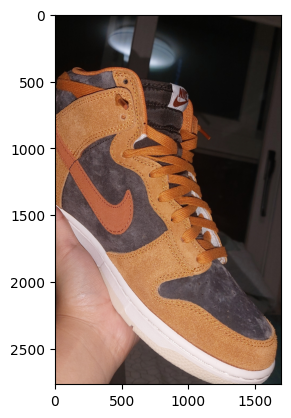

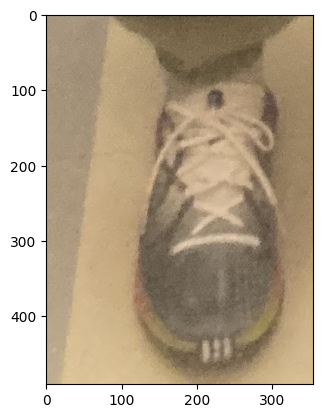

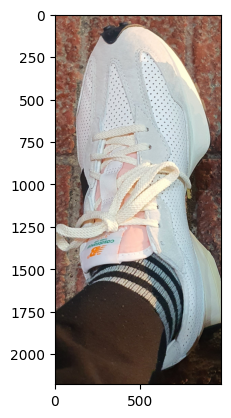

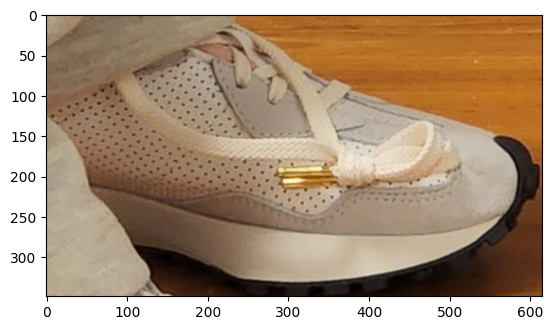

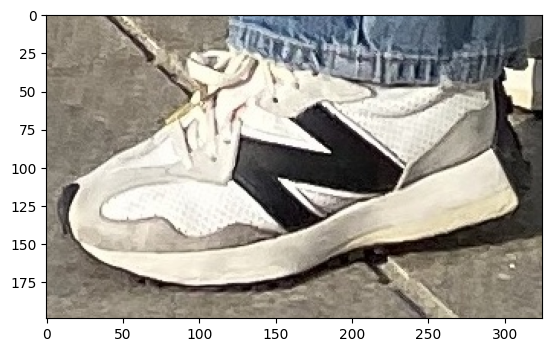

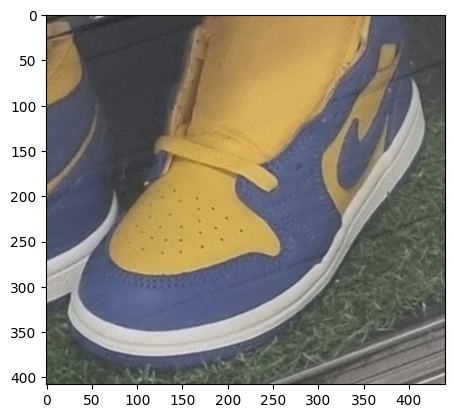

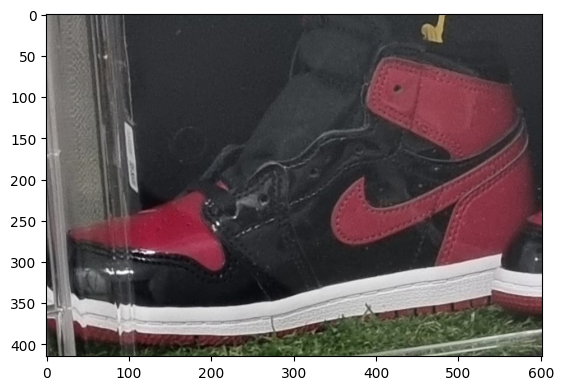

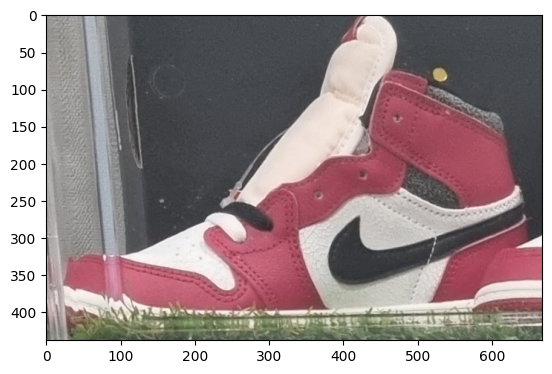

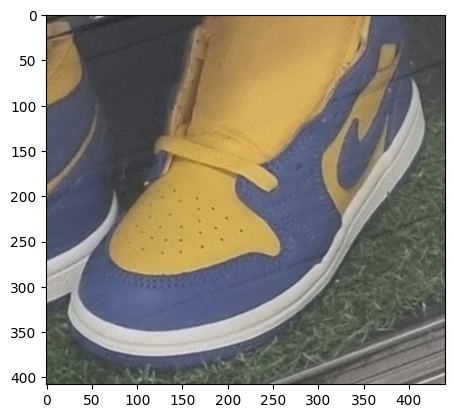

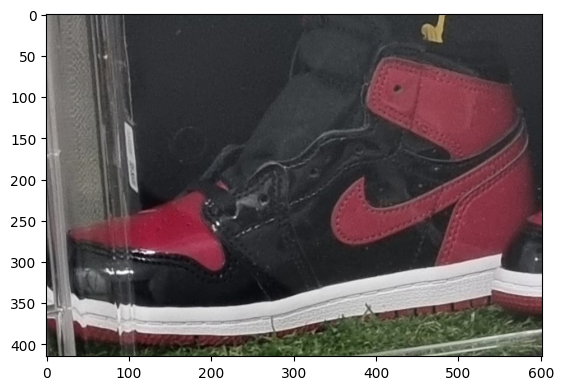

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as img

for c_img in cropped_img_list[2200:2210]:
  img_test = img.imread(c_img)
  plt.imshow(img_test)
  plt.show()

In [ ]:
import torch
import pickle #모델 pickle형식으로 저장하기

model = torch.load('./yolov5/best.pt')
pickle.dump(model, open('model.pkl','wb'))

In [25]:
# !python -m ipykernel install --user --nbame=venv #이 코드 파일의 kernel은 venv로 설정해야 하고, ipykernel을 설치해야 함

usage: ipython-kernel-install [-h] [--user] [--name NAME]
                              [--display-name DISPLAY_NAME]
                              [--profile PROFILE] [--prefix PREFIX]
                              [--sys-prefix] [--env ENV VALUE]
ipython-kernel-install: error: unrecognized arguments: --nbame=venv


In [35]:
len(img_list)

82462

In [ ]:
import os
# os.environ['LD_LIBRARY_PATH'] = os.getcwd()  # or whatever path you want
os.environ['PATH'] = f"/usr/local/cuda-11.3/bin:${os.environ['PATH']}"
os.environ['LD_LIBRARY_PATH'] = f"/home/psw1022s/sample_venv/lib/python3.7/site-packages/nvidia/cublas/lib/:{os.environ['LD_LIBRARY_PATH']}"

### 전체 이미지 개수 확인

In [1]:
# %pip uninstall nvidia-cublas-cu11 -y
#%pip install torch==1.12.0
%pip install nvidia-cublas-cu11==11.10.3.66

  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 확인
for shoe_obj in data[:5]:
  shoe_name = shoe_obj['product']['release']['name'] #신발 이름  
  prod_id = shoe_obj['product']['release']['id'] #신발 상품 ID
  
  JORDAN_JSON_DIR = f"./data/j_images/{prod_id}"
  print(prod_id)

25456
25455
25034
24908
24851


In [ ]:
%cd ../

/home/psw1022s
